___Image Transformations___

In [1]:
#import important Libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np 

__Linear - Negative Transformation__

It's Expression : s=l-1-r

1. s => new pixel Value
2. l => Number of Levels
3. r => Original pixel value

In [13]:
#define a dunction to display an image using matplotlib

def imshow(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="grey")
    plt.show()

In [38]:
orginal_img=cv2.imread("./imgs/14.jpg")

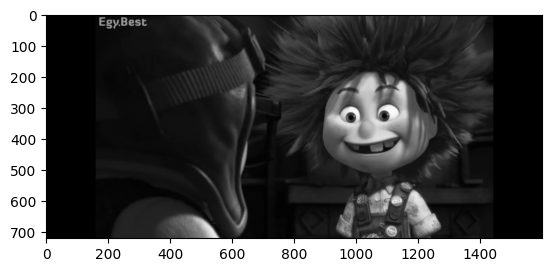

In [39]:
imshow(orginal_img)

Let's find out the number of level in the image

In [40]:
print(f"Data Types of the image is: {orginal_img.dtype}")

Data Types of the image is: uint8


As it's uint8 --> unsigned integer with 8 bits, we can have 256 different levels so that L=256

In [41]:
L=256
gray_img=cv2.cvtColor(orginal_img,cv2.COLOR_BGR2GRAY)
negative_img=256-1-gray_img

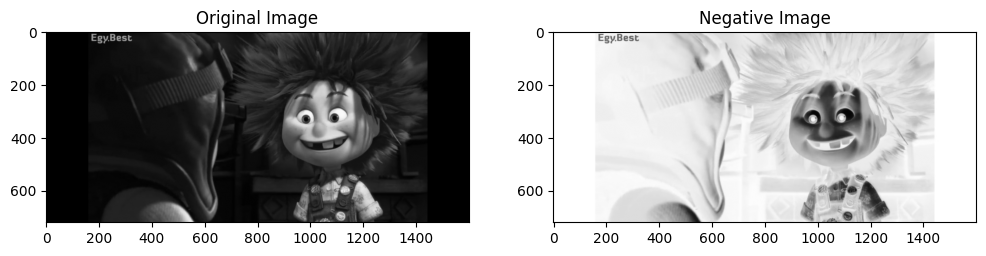

In [42]:
fig=plt.figure(figsize=(12,8)) # to set the border of the figure that will contain the two images.
ax1,ax2=fig.subplots(1,2)
ax1.imshow(gray_img,cmap='grey')
ax1.set_title('Original Image')
ax2.imshow(negative_img,cmap="grey")
ax2.set_title("Negative Image")
plt.show()

___Log Transformations___

this transformation maps a narrow range of low gray level values in the input image into a wider range of output levels.

The General form Transformation: s=c.log(1+r)

1. C is a constant to ensure the transformed image have the same range of values as original image.
2. We add 1 into the log because of black pixels have intensitity 0 and log 0 is undefined. 

WE need to make --> L-1 = c* log(1+max(r))

.'. c = (l-1)/log(1+max(r))

In [43]:
# WE use the following formula to get C

epsilion = 1e-6  # to avoid dividing by zero.
c = (L-1)/(np.log(1+np.max(gray_img))+epsilion)  # here we add epsilion to avoid the black value of pixel.
log_img=np.array(np.multiply(c,np.log(1+gray_img+epsilion)),dtype="uint8")
print(log_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


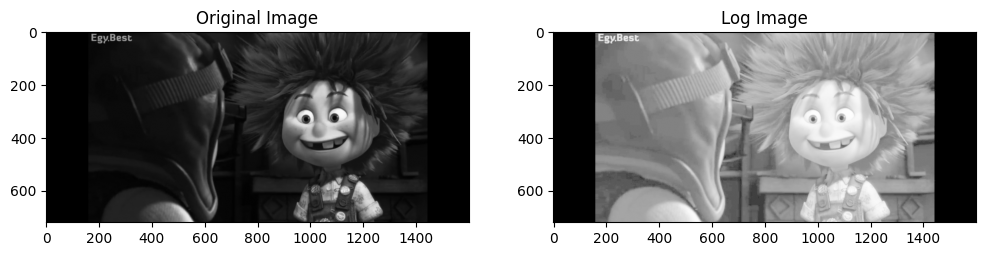

In [44]:
fig=plt.figure(figsize=(12,8)) # to set the border of the figure that will contain the two images.
ax1,ax2=fig.subplots(1,2)
ax1.imshow(gray_img,cmap='grey')
ax1.set_title('Original Image')
ax2.imshow(log_img,cmap="grey")
ax2.set_title("Log Image")
plt.show()

___Power Law Transformation "Gamma Transformation"___

As with log transformation, power-law curves with fractional values og g "gamma" . It map a narrow range of dark input values intp a wider range of output values. with the opposite being true for the higher values of input levels.

It's form Transformation: s = (L-1)*(r/(L-1))**gamma => here we multiply in (L-1) then divide on it to get faster computations.

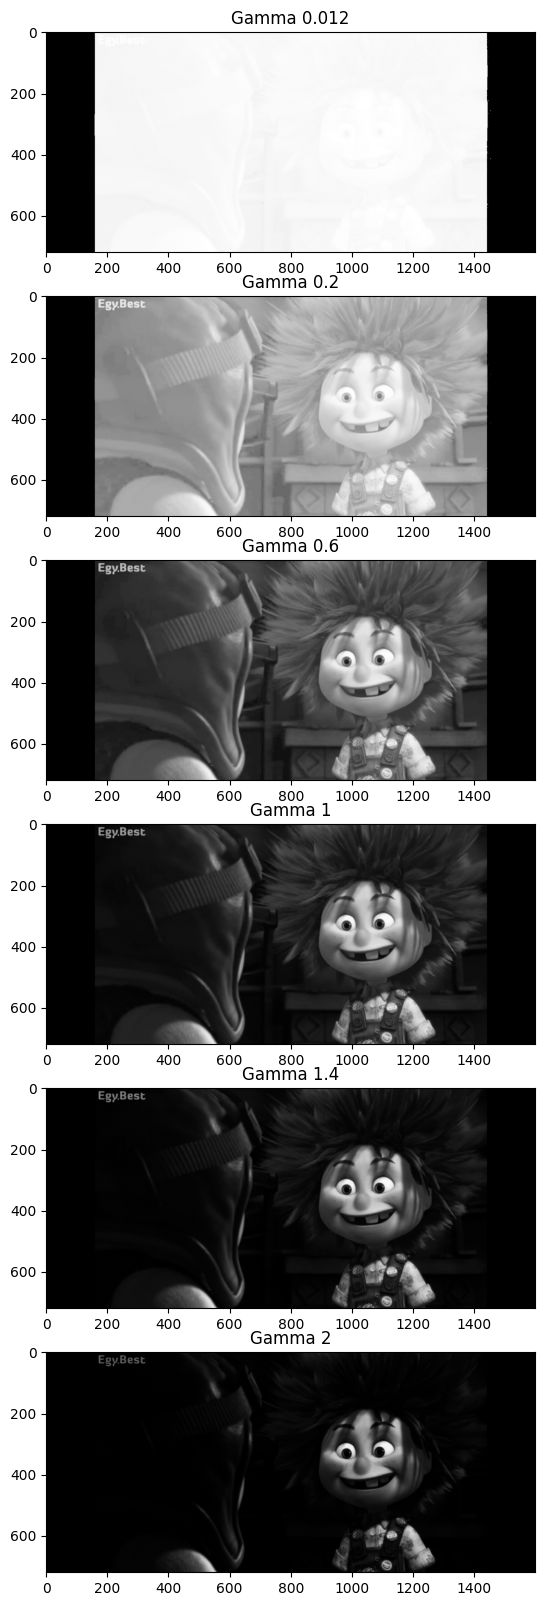

In [48]:
Gammas=[0.012,0.2,0.6,1,1.4,2]  # different values of gamma.
fig=plt.figure(figsize=(10,20))
axes=fig.subplots(6,1)
# enumerate returns index and value
for index,gamma in enumerate(Gammas):
    power_img=(L-1)*(gray_img/(L-1))**gamma
    power_img=np.array(power_img,dtype="uint8")  # to convert the image into a numpy array with uint8 data type
    axes[index].imshow(power_img,cmap="gray")
    axes[index].set_title(f"Gamma {gamma}")
    